# KPCA Eigenfaces: Smiley Data Set

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

(205, 2)


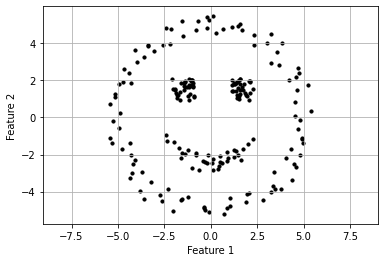

In [2]:
np.random.seed(1)

# Generate a smiley data
N = 100
t = np.linspace(0, 2*np.pi, N)
X = 5*np.vstack((np.sin(t), np.cos(t))).T + np.random.rand(N, 2) - 0.5
for _ in range(35):
    xp = np.random.rand()*5 - 2.5
    yp = 0.25*xp ** 2 - 2.5 + np.random.rand() - 0.5
    p1 = 1.2*np.random.rand(1, 2) + np.array([-1.6, 1.4]) - 0.5
    p2 = 1.2*np.random.rand(1, 2) + np.array([1.6, 1.4]) - 0.5
    p3 = np.array([xp, yp])
    X = np.vstack((X, p1, p2, p3))

print(X.shape)
              
plt.scatter(X[:,0], X[:,1], c='k', s=10)
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

## Perform KPCA

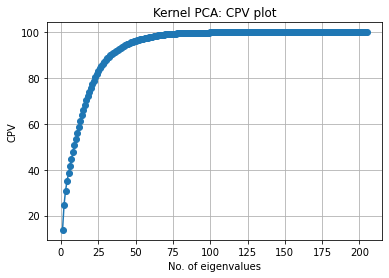

In [3]:
# Define the kernel function:
def kernel_func(x1, x2, kw):
    return np.exp(-pairwise_distances(x1, x2, metric='sqeuclidean') / kw ** 2)

# Compute the kernel covariance matrix
kw = 1.2
K = kernel_func(X, X, kw)

# Center the kernel matrix
N = len(X)
U = np.ones((N, N)) / N
Kc = K - U @ K - K @ U + U @ K @ U  

# Perform eigenvalue decomposition
eigvals, eigvecs = np.linalg.eig(Kc / N)

# Ensure the eigenvalues are sorted in decreasing order
ind = (-eigvals).argsort()
eigvals = eigvals[ind]
eigvecs = eigvecs[:,ind]

# Compute the projection matrix
n_comp = 9
P = eigvecs[:,:n_comp] @ np.diag(eigvals[:n_comp] ** -0.5)

# Plot the CPV
cpv = np.cumsum(eigvals) / np.sum(eigvals) * 100
plt.plot(range(1,len(eigvals)+1),cpv,'o-')
plt.title('Kernel PCA: CPV plot')
plt.xlabel('No. of eigenvalues')
plt.ylabel('CPV')
plt.grid()
plt.show()

## Plot eigenfaces

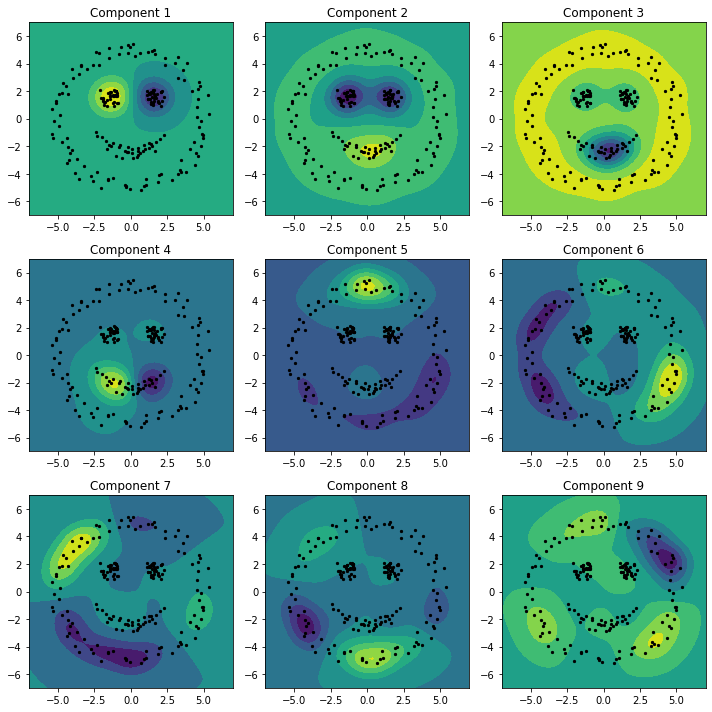

In [4]:
x1, x2 = np.meshgrid(np.linspace(-7, 7, 100),
                       np.linspace(-7, 7, 100))
X_test = np.hstack((x1.reshape(-1,1), 
                    x2.reshape(-1,1)))

N_test = len(X_test)
K_test = kernel_func(X_test, X, kw)
U_test = np.ones((N_test, N)) / N
Kc_test = K_test - U_test @ K - K_test @ U + U_test @ K @ U

fig, ax = plt.subplots(3, 3, figsize=(10,10))
for j in range(9):
    
    # Project the jth component
    Y = Kc_test @ P[:,j]
    Y = Y.reshape(x1.shape)
    
    r, c = int(j / 3), int(j % 3)
    ax[r, c].contourf(x1, x2, Y)
    ax[r, c].scatter(X[:,0], X[:,1], c='k', s=5)
    ax[r, c].set_title(f"Component {j+1}")

plt.tight_layout()
plt.show()